<a href="https://colab.research.google.com/github/shakshi3105/data-preprocessing-and-cleaning/blob/main/PR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing important libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
import scipy as sp
import statsmodels as sm

In [2]:
#Loading the dataset
df=pd.read_csv("/content/DATA - 3.csv")

In [3]:
#To understand data we have to know no. of rows and columns
df.shape
print("No. of rows :",df.shape[0])
print("No. of columns :",df.shape[1])

No. of rows : 73609
No. of columns : 13


In [4]:
#Reading the dataset

In [5]:
df.head(3)

,participantID,age,nativeLanguage,gender,education,city,country,responseID,section,cue,R1,R2,R3
0,12,28,URU_R,Fe,4,Montevideo,Uruguay,128,set_2013,bar,abierto,cerveza,noche
1,12,28,URU_R,Fe,4,Montevideo,Uruguay,129,set_2013,tren,expreso,nocturno,bala
2,12,28,URU_R,Fe,4,Montevideo,Uruguay,130,set_2013,mano,libre,derecha,hermano


In [6]:
df.tail(3)

,participantID,age,nativeLanguage,gender,education,city,country,responseID,section,cue,R1,R2,R3
73606,5559,20,NaN,Fe,3,NaN,Colombia,73824,set_2014,y,puente,letra,final
73607,5559,20,NaN,Fe,3,NaN,Colombia,73825,set_2014,por,pregunta,respuesta,letras
73608,5559,20,NaN,Fe,3,NaN,Colombia,73826,set_2014,construcción,casa,ladrillo,NaN


In [7]:
#let's check the datatype for the following
type(df)

pandas.core.frame.DataFrame

In [8]:
#To understand the data we must know the information

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73609 entries, 0 to 73608
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participantID   73609 non-null  int64 
 1   age             73609 non-null  int64 
 2   nativeLanguage  71943 non-null  object
 3   gender          73609 non-null  object
 4   education       73609 non-null  int64 
 5   city            54482 non-null  object
 6   country         73375 non-null  object
 7   responseID      73609 non-null  int64 
 8   section         73609 non-null  object
 9   cue             73609 non-null  object
 10  R1              73579 non-null  object
 11  R2              73588 non-null  object
 12  R3              73591 non-null  object
dtypes: int64(4), object(9)
memory usage: 7.3+ MB


In [12]:
df.describe()

,participantID,age,education,responseID
count,73609.000000,73609.000000,73609.000000,73609.000000
mean,2716.202054,33.151721,3.888859,38039.024454
std,1590.432970,13.692914,0.650422,22644.229115
min,12.000000,5.000000,1.000000,128.000000
25%,1328.000000,23.000000,3.000000,18858.000000
50%,2789.000000,30.000000,4.000000,37570.000000
75%,4038.000000,40.000000,4.000000,56371.000000
max,5559.000000,99.000000,5.000000,103589.000000


In [13]:
#let's check whether their is any null value or not
df.isnull().values.any()

True

In [14]:
#if yes we must know how many null values are there so.....
df.isnull().sum()

participantID         0
age                   0
nativeLanguage     1666
gender                0
education             0
city              19127
country             234
responseID            0
section               0
cue                   0
R1                   30
R2                   21
R3                   18
dtype: int64

In [15]:
#nunique tells us the no. of unique values in each columns
df.nunique()

participantID      4090
age                  76
nativeLanguage        4
gender                2
education             5
city                187
country              36
responseID        73609
section               2
cue                1980
R1                13025
R2                14217
R3                14033
dtype: int64

In [16]:
#let's know the unique value in each column

In [17]:
df.nativeLanguage.unique()

array(['URU_R', 'ARG_C', nan, 'ARG_R', 'ARG_N'], dtype=object)

In [18]:
df.gender.unique()

array(['Fe', 'Ma'], dtype=object)

In [19]:
df.city.unique()

array(['Montevideo', nan, 'Cachan', 'Paris', 'Mendoza', 'notfound',
       'Buenos Aires', 'Cambridge', 'Santiago', 'Bures-sur-yvette',
       'Moza', 'Mezel', 'La Paz', 'Federal', 'Lascano', 'Bridgewater',
       'Los Cerrillos', 'Pforzheim', 'Maipú', 'Tallahassee',
       'Las Piedras', 'Bayona', 'Minas', 'Tucumán', 'Drummoyne',
       'Tel Aviv', 'Huancavelica', 'Palermo', 'La Habana', 'Ames',
       'Mountain View', 'Moreno', 'Rochester', 'Vigo', 'Munro', 'Rosario',
       'Ituzaingó', 'New York', 'Dietmannsried', 'Berlin',
       'Pietermaritzburg', 'Ripollet', 'Córdoba', 'Opera', 'Partille',
       'Rio De Janeiro', 'Carrasco', 'Málaga', 'Aguas Corrientes',
       'Lanús', 'Montreal', 'São Paulo', 'Jujuy', 'Requena', 'Washington',
       'Salem', 'Gadsden', 'Bronx', 'Sevilla', 'Tel Mond',
       'Santa Coloma De Cervelló', 'Pilar', 'Montalieu', 'Paterna',
       'Philadelphia', 'Barcelona', 'Toronto', 'Niterói', 'Auckland',
       'East Rockaway', 'Valladolid', 'Madrid', 'Lima', 

In [20]:
df.responseID.unique()

array([  128,   129,   130, ..., 73824, 73825, 73826])

In [21]:
df.R1.unique()

array(['abierto', 'expreso', 'libre', ..., 'oculta', 'atiendo',
       'en bicicleta'], dtype=object)

In [22]:
df.R2.unique()

array(['cerveza', 'nocturno', 'derecha', ..., 'a pie', 'inflamación',
       'bosques'], dtype=object)

In [23]:
df.R3.unique()

array(['noche', 'bala', 'hermano', ..., 'por el mundo', 'con mis hijos',
       'Matas'], dtype=object)

In [24]:
df.education.unique()

array([4, 1, 5, 3, 2])

In [25]:
df.cue.unique()

array(['bar', 'tren', 'mano', ..., 'pipa', 'clavo', 'abajo'], dtype=object)

In [26]:
#Let's convert categorical data into numerical data

In [27]:
df.nativeLanguage.value_counts()

URU_R    66759
ARG_R     4032
ARG_C     1080
ARG_N       72
Name: nativeLanguage, dtype: int64

In [28]:
df['nativeLanguage_numeric']=pd.factorize(df.nativeLanguage)[0]

In [29]:
df

,participantID,age,nativeLanguage,gender,education,city,country,responseID,section,cue,R1,R2,R3,nativeLanguage_numeric
0,12,28,URU_R,Fe,4,Montevideo,Uruguay,128,set_2013,bar,abierto,cerveza,noche,0
1,12,28,URU_R,Fe,4,Montevideo,Uruguay,129,set_2013,tren,expreso,nocturno,bala,0
2,12,28,URU_R,Fe,4,Montevideo,Uruguay,130,set_2013,mano,libre,derecha,hermano,0
3,12,28,URU_R,Fe,4,Montevideo,Uruguay,131,set_2013,sopa,fría,Mafalda,verde,0
4,12,28,URU_R,Fe,4,Montevideo,Uruguay,132,set_2013,especie,ave,Darwin,extinción,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73604,5559,20,NaN,Fe,3,NaN,Colombia,73822,set_2014,horario,clase,estudio,puntualidad,-1
73605,5559,20,NaN,Fe,3,NaN,Colombia,73823,set_2014,troncos,árboles,bosques,Matas,-1
73606,5559,20,NaN,Fe,3,NaN,Colombia,73824,set_2014,y,puente,letra,final,-1
73607,5559,20,NaN,Fe,3,NaN,Colombia,73825,set_2014,por,pregunta,respuesta,letras,-1


In [30]:
df['city_numeric']=pd.factorize(df.city)[0]
df['gender_numeric']=pd.factorize(df.gender)[0]
df['cue_numeric']=pd.factorize(df.cue)[0]
df['R1_numeric']=pd.factorize(df.R1)[0]
df['R2_numeric']=pd.factorize(df.R2)[0]
df['R3_numeric']=pd.factorize(df.R3)[0]
df['country_numeric']=pd.factorize(df.country)[0]
df['section_numeric']=pd.factorize(df.section)[0]

In [31]:
df

,participantID,age,nativeLanguage,gender,education,city,country,responseID,section,cue,...,R3,nativeLanguage_numeric,city_numeric,gender_numeric,cue_numeric,R1_numeric,R2_numeric,R3_numeric,country_numeric,section_numeric
0,12,28,URU_R,Fe,4,Montevideo,Uruguay,128,set_2013,bar,...,noche,0,0,0,0,0,0,0,0,0
1,12,28,URU_R,Fe,4,Montevideo,Uruguay,129,set_2013,tren,...,bala,0,0,0,1,1,1,1,0,0
2,12,28,URU_R,Fe,4,Montevideo,Uruguay,130,set_2013,mano,...,hermano,0,0,0,2,2,2,2,0,0
3,12,28,URU_R,Fe,4,Montevideo,Uruguay,131,set_2013,sopa,...,verde,0,0,0,3,3,3,3,0,0
4,12,28,URU_R,Fe,4,Montevideo,Uruguay,132,set_2013,especie,...,extinción,0,0,0,4,4,4,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73604,5559,20,NaN,Fe,3,NaN,Colombia,73822,set_2014,horario,...,puntualidad,-1,-1,0,1652,435,408,3882,20,1
73605,5559,20,NaN,Fe,3,NaN,Colombia,73823,set_2014,troncos,...,Matas,-1,-1,0,1395,841,14216,14032,20,1
73606,5559,20,NaN,Fe,3,NaN,Colombia,73824,set_2014,y,...,final,-1,-1,0,1024,3050,4505,180,20,1
73607,5559,20,NaN,Fe,3,NaN,Colombia,73825,set_2014,por,...,letras,-1,-1,0,1943,726,158,1082,20,1


In [32]:
#As we can see number of columns have been increased
df.shape
print("No. of rows :",df.shape[0])
print("No. of columns :",df.shape[1])

No. of rows : 73609
No. of columns : 22


In [ ]:
columns_to_drop = ['nativeLanguage', 'city','R1','R2','R3','cue','gender','section','country']
df.drop(columns=columns_to_drop, inplace=True,axis=1)

In [38]:
df

,participantID,age,education,responseID,nativeLanguage_numeric,city_numeric,gender_numeric,cue_numeric,R1_numeric,R2_numeric,R3_numeric,country_numeric,section_numeric
0,12,28,4,128,0,0,0,0,0,0,0,0,0
1,12,28,4,129,0,0,0,1,1,1,1,0,0
2,12,28,4,130,0,0,0,2,2,2,2,0,0
3,12,28,4,131,0,0,0,3,3,3,3,0,0
4,12,28,4,132,0,0,0,4,4,4,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73604,5559,20,3,73822,-1,-1,0,1652,435,408,3882,20,1
73605,5559,20,3,73823,-1,-1,0,1395,841,14216,14032,20,1
73606,5559,20,3,73824,-1,-1,0,1024,3050,4505,180,20,1
73607,5559,20,3,73825,-1,-1,0,1943,726,158,1082,20,1


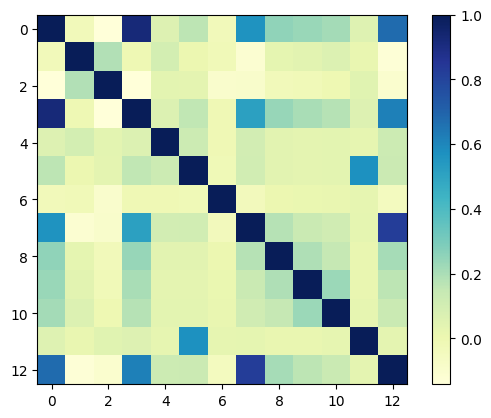

In [39]:
plt.imshow(df.corr(), cmap='YlGnBu')
plt.colorbar()
plt.show()

<Axes: xlabel='age', ylabel='education'>

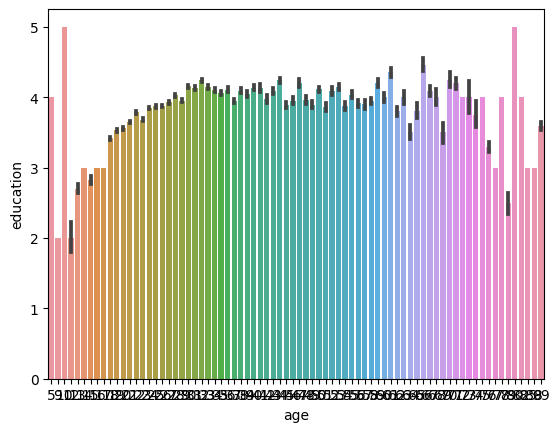

In [42]:
sns.barplot(data=df,x='age',y='education',label=None)

In [43]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [44]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [45]:
df=X.dropna(inplace=True)
df=X.fillna(X.mean(), inplace=True)

In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [48]:
X_train

,participantID,age,education,responseID,nativeLanguage_numeric,city_numeric,gender_numeric,cue_numeric,R1_numeric,R2_numeric,R3_numeric,country_numeric
32058,2311,37,5,32067,0,0,0,368,223,8349,6463,0
10697,780,28,4,10845,0,0,1,459,801,4267,4002,0
14107,1029,27,4,14256,2,5,1,781,4581,625,1177,2
6614,473,48,4,6779,0,-1,0,193,173,3083,2862,0
63580,4725,34,4,63798,0,0,1,625,202,22,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21243,1527,20,4,21395,0,0,0,138,2693,6489,6323,0
45891,3394,59,5,46082,0,0,0,656,21,114,2536,0
42613,3174,60,4,42804,0,-1,0,695,2907,780,5649,0
43567,3243,28,4,43758,0,4,1,266,6224,5402,3193,3


In [49]:
X_test

,participantID,age,education,responseID,nativeLanguage_numeric,city_numeric,gender_numeric,cue_numeric,R1_numeric,R2_numeric,R3_numeric,country_numeric
14056,1026,88,3,14241,0,0,0,558,1158,5039,12,0
2158,170,30,4,2250,0,4,1,418,356,320,474,3
50177,3703,33,4,50370,0,0,0,464,292,1302,12,0
25007,1799,64,3,25160,0,-1,1,658,3795,1469,247,0
39293,2956,45,3,39448,0,0,0,658,7207,269,1187,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1011,89,44,5,1103,0,0,1,857,40,731,666,0
44008,3272,45,4,44199,0,112,0,626,272,22,12,8
61184,4530,33,3,61402,0,0,1,665,260,12691,12599,0
17385,1258,29,3,17535,0,0,0,762,112,590,1211,0


In [50]:
Y_train

32058    0
10697    0
14107    0
6614     0
63580    0
        ..
21243    0
45891    0
42613    0
43567    0
68268    1
Name: section_numeric, Length: 58887, dtype: int64

In [51]:
Y_test

14056    0
2158     0
50177    0
25007    0
39293    0
        ..
1011     0
44008    0
61184    0
17385    0
11797    0
Name: section_numeric, Length: 14722, dtype: int64

In [52]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,mean_absolute_percentage_error

In [53]:
ler=LinearRegression()
ler.fit(X_train,Y_train)

LinearRegression()

In [54]:
predictions=ler.predict(X_test)

In [55]:
predictions

array([-0.09446382, -0.16004874,  0.17100923, ...,  0.3250088 ,
        0.12685142,  0.07216072])

In [57]:
predictions=predictions.astype(int)

In [58]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [59]:
from math import sqrt

In [60]:
accuracy=accuracy_score(Y_test,predictions)
precision=precision_score(Y_test,predictions,average='weighted',zero_division=1)

In [62]:
recall=recall_score(Y_test,predictions,average='weighted')

In [63]:
print("Accuracy=",accuracy)
print("Precision=",precision)
print("Recall=",recall)

Accuracy= 0.8011139790789295
Precision= 0.8420200109177111
Recall= 0.8011139790789295


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
model=LinearRegression()
para_grid={
    "file Intercept":[True,False],
    "positive":[True,False]
}
grid_search=GridSearchCV(estimator=model, param_grid=para_grid,cv=5)

In [79]:
import scipy.stats as stats

In [85]:
warnings.filterwarnings("ignore",category=RuntimeWarning)

In [90]:
#accuracy
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
mean_absolute_error(Y_test,predictions)

0.1988860209210705

In [88]:
mean_absolute_percentage_error(Y_test,predictions)

0.1988860209210705

In [89]:
mean_squared_error(Y_test,predictions)

0.1988860209210705